# Student Perfomance Indicator
Life cycle of Machine Learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
### 1) Problem Statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### 2) Data Collection
* Dataset Sourse - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
* The data consists of 8 columns and 1000 rows
#### 2.1 Import Data and Required Packages
Importing Numpy, Pandas, Matplotlib, Seaborn and Warning Library



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

#### 2.2 Dataset information
* gender: sex of students -> (Male/Female)
* race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
* parental level of education: parents' final education -> (bachelor's degree, some college, master's degree, associate's degee, high school)
* lunch: having lunch before test (standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

### 3. Data Checs to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statictisc of data set
* Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [13]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

#### 3.2 Check Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the dataset

#### 3.3 Check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [17]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistic of data set

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
* From above description of numerical data, all means are very close to each other - between 66 adn 68.5;
* All standard deviation are also close - between 14.6 and 15.9;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading is much higher = 17

#### 3.7 Exploring Data

In [20]:
print("Categories in 'gender' variable: ", end=' ')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=' ')
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=' ')
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=' ')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=' ')
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [24]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numeric features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numeric features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [25]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of stunents with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of stunents with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [29]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of stunents with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of stunents with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


##### Insights
* From adove values we get students have performed the worst in Maths
* Best perfomance is in reading section

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distibution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

<Axes: xlabel='average', ylabel='Count'>

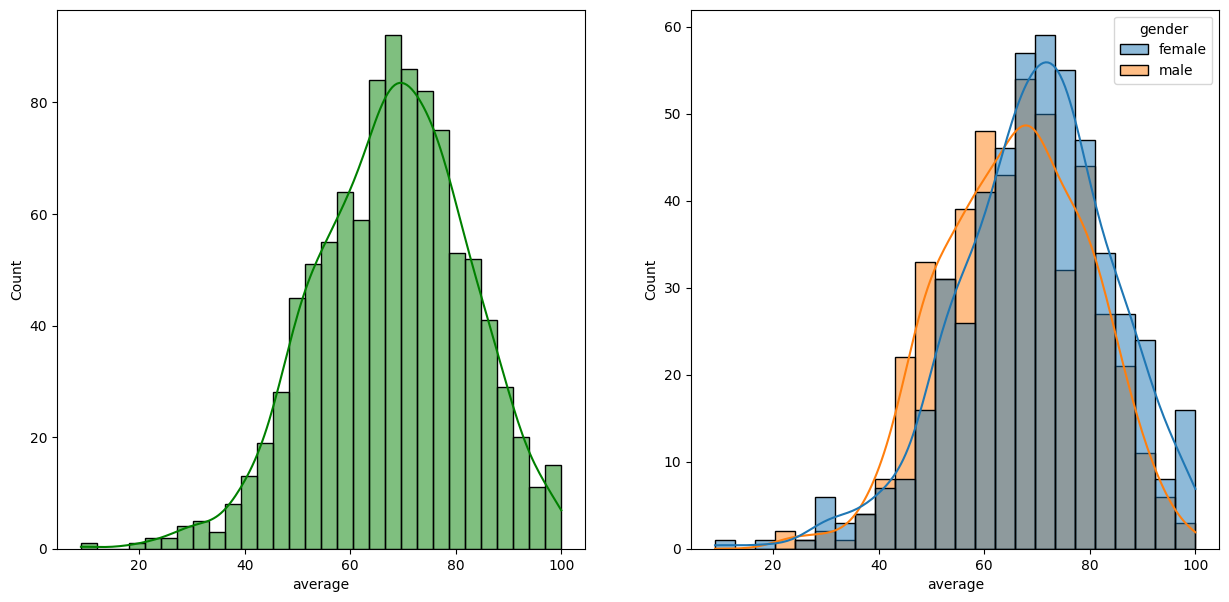

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average', kde=True, hue='gender')

##### Insights
* Female studnets tend to perform well than male students.

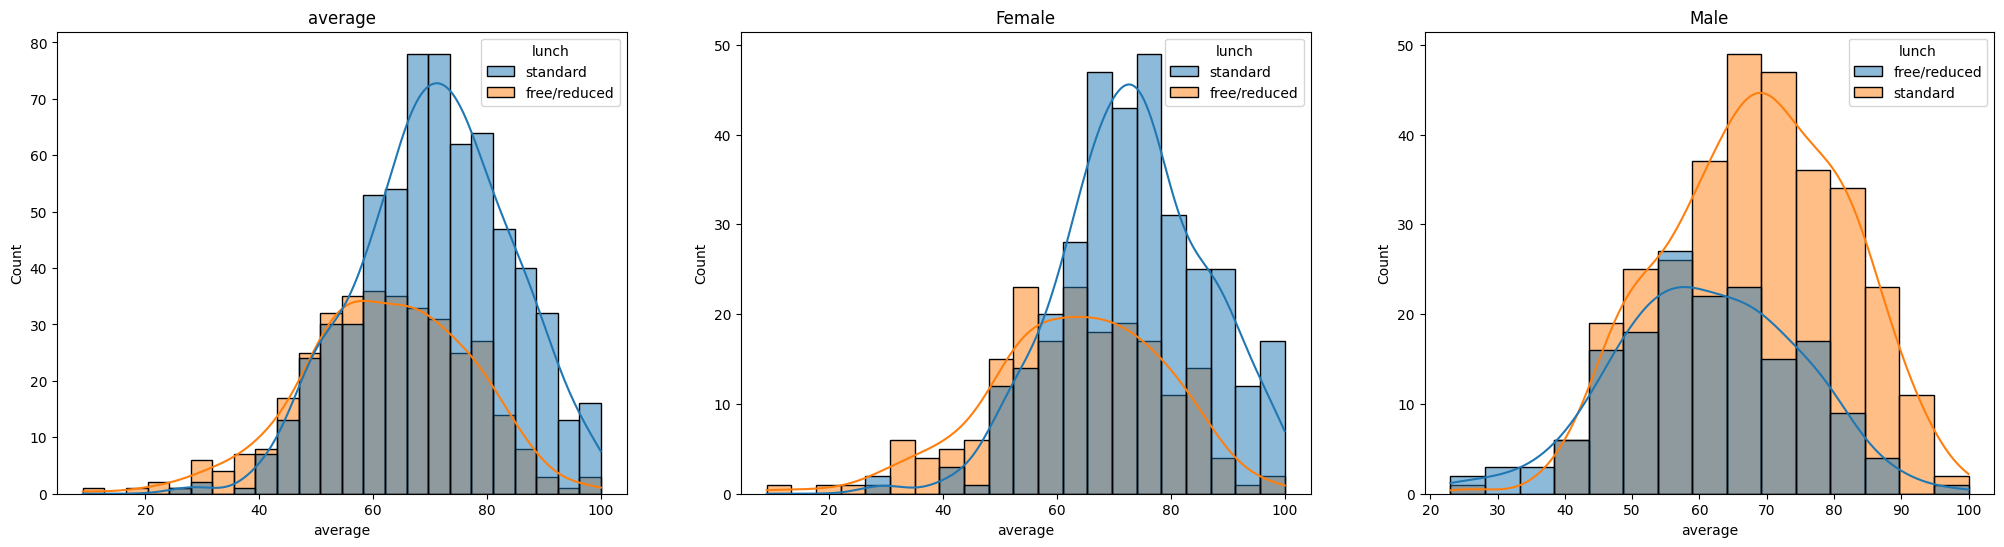

In [50]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('average')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x ='average', kde=True, hue='lunch')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='lunch')
plt.title('Male')
plt.show()

##### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


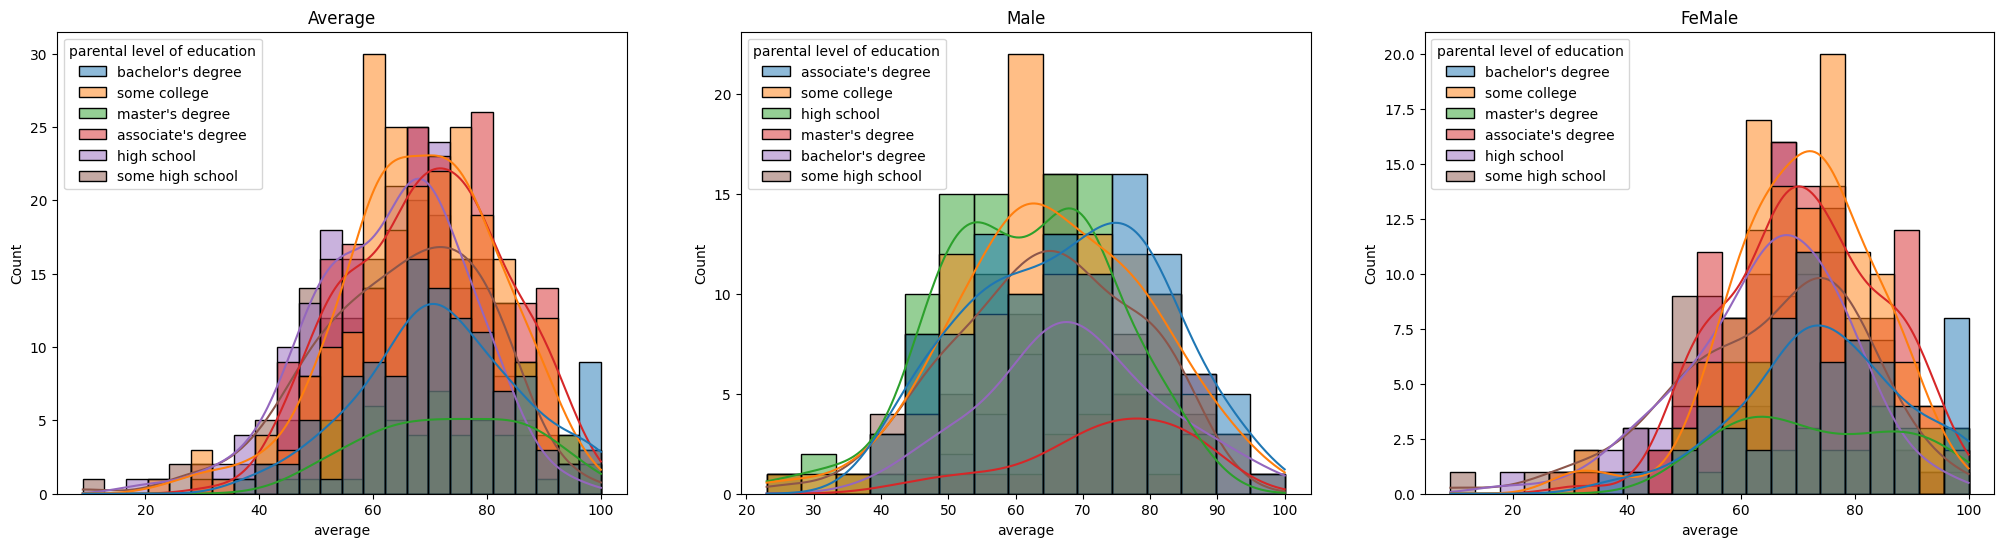

In [52]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.title('Average')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x ='average', kde=True, hue='parental level of education')
plt.title('Male')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental level of education')
plt.title('FeMale')
plt.show()

##### Insights
* In general parten't eductaion don't help sutent perform well in exam.
* 2nd plot shows that parent's whose education is of associative's degree of master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's eductaion on female studnets.

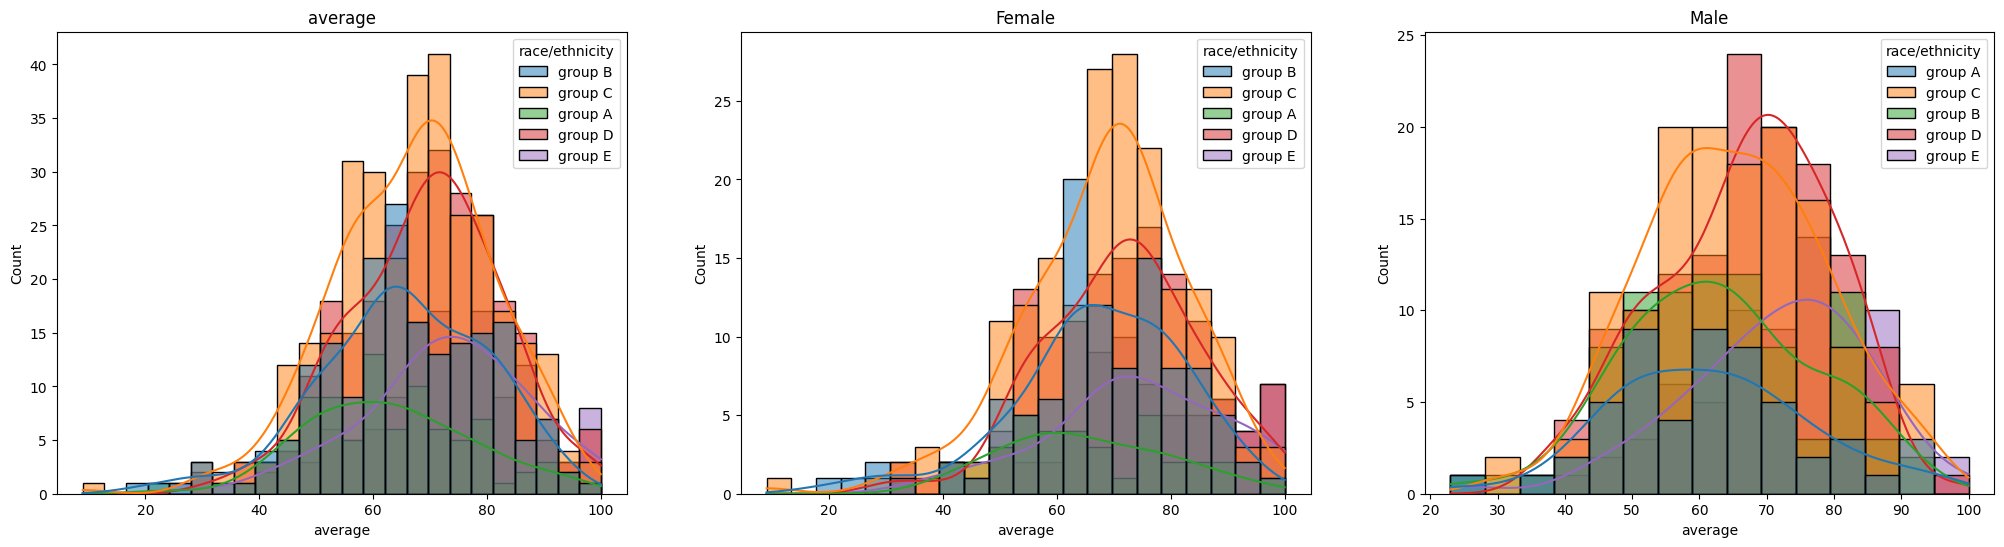

In [53]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.title('average')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x ='average', kde=True, hue='race/ethnicity')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race/ethnicity')
plt.title('Male')
plt.show()

##### Insights
* Student of group A and group B tends to perform poorly in exam.

#### 4.2 Maximum score of students in all three subjects

<Axes: title={'center': 'Writing Scores'}, ylabel='writing score'>

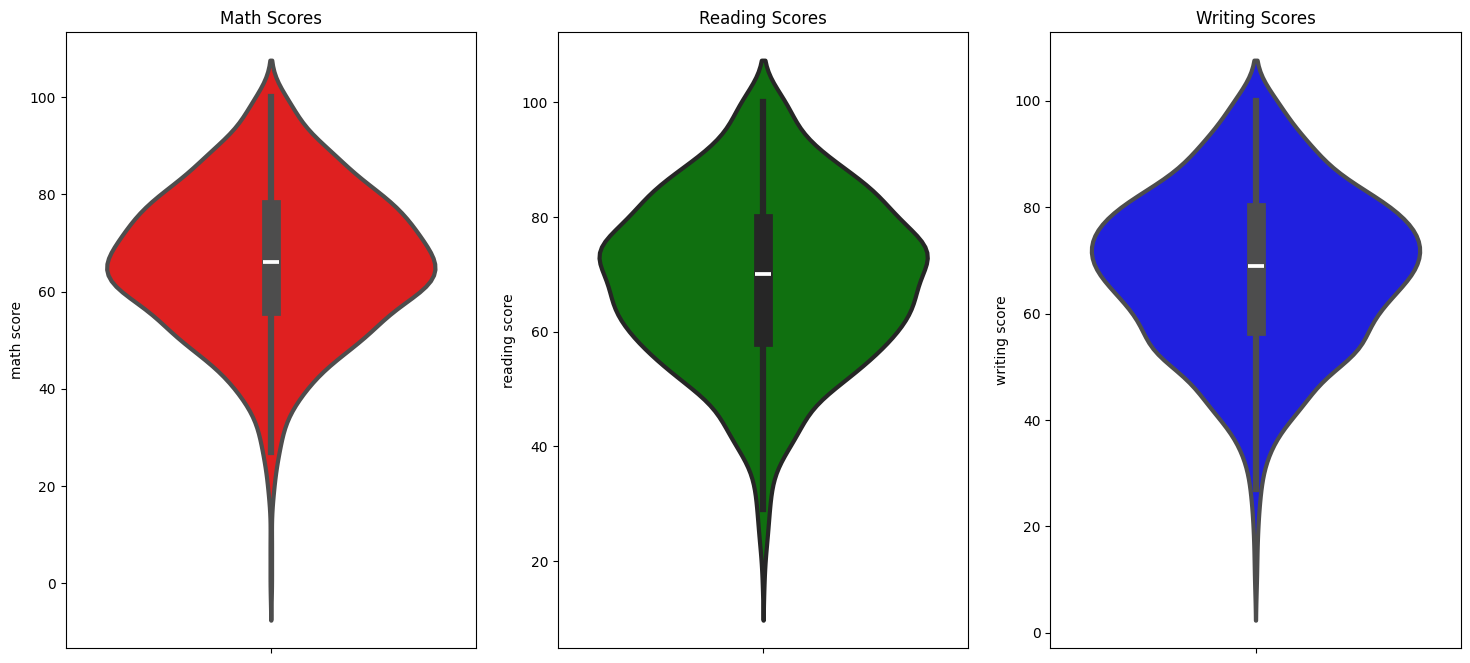

In [54]:
plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title('Math Scores')
sns.violinplot(y='math score', data=df, color='red',linewidth=3)
plt.subplot(132)
plt.title('Reading Scores')
sns.violinplot(data=df, y='reading score', color='green', linewidth=3)
plt.subplot(133)
plt.title("Writing Scores")
sns.violinplot(data=df, y='writing score', color='blue', linewidth=3)


##### Insights
* From the above three plots it's clearly visible that most of students score in between 60-80 

##### 4.3 Multivariate analysis using pieplot

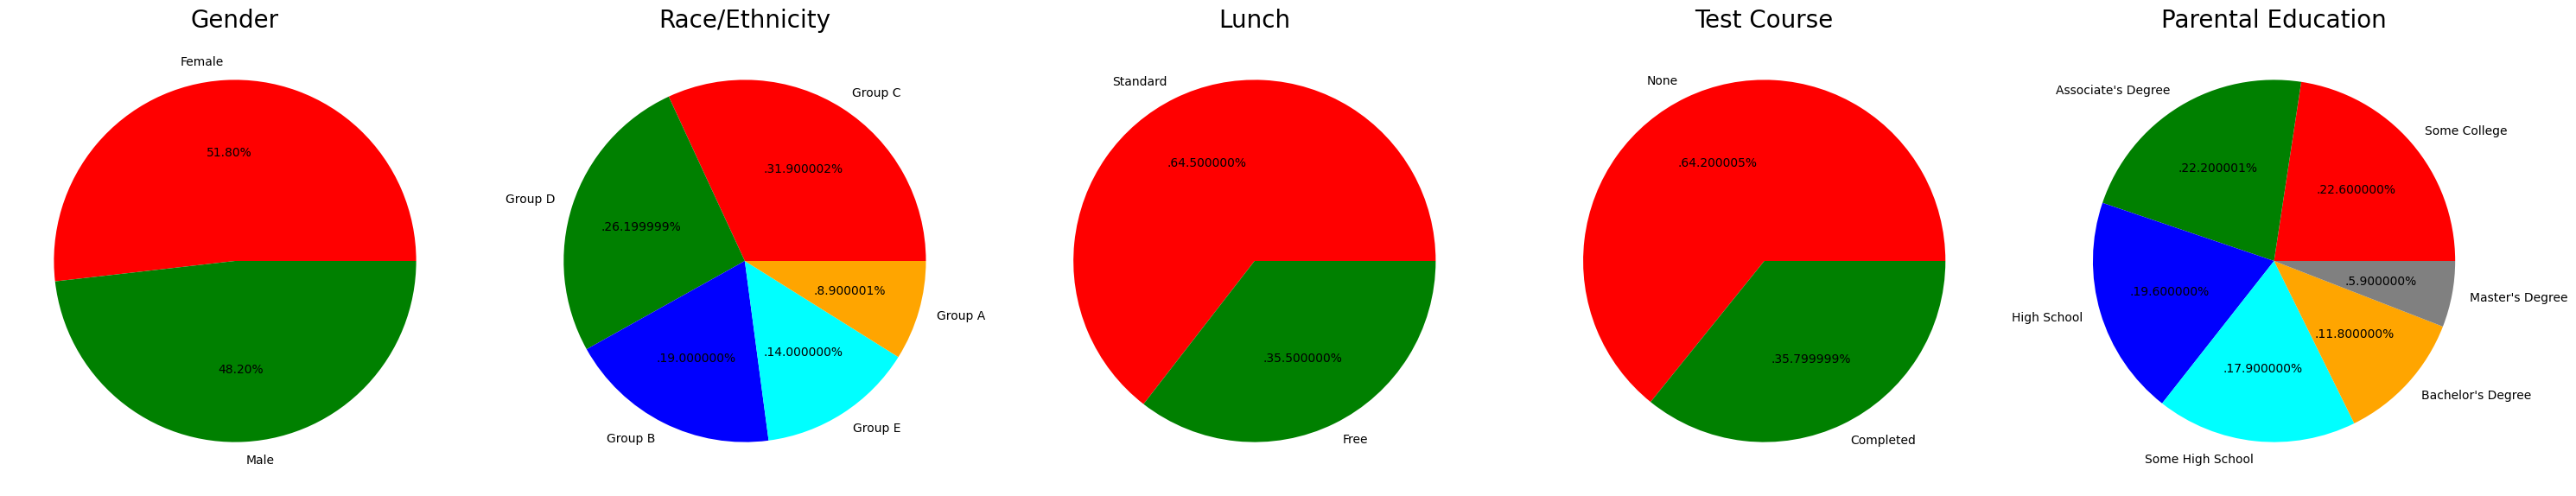

In [63]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors=color, labels= labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
* Number of Male and Female students is almost equal
* Number students are greater in Group C
* Number of students who have standard lunch are greater
* Number of studnets who have not enrolled in any test preparatin course is greater
* Number of students whose parental educaitn is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualizaiton
##### 4.4.1 Gender Column
* How is distribution of Gender?
* Is gender has any impact on student's perpormance?

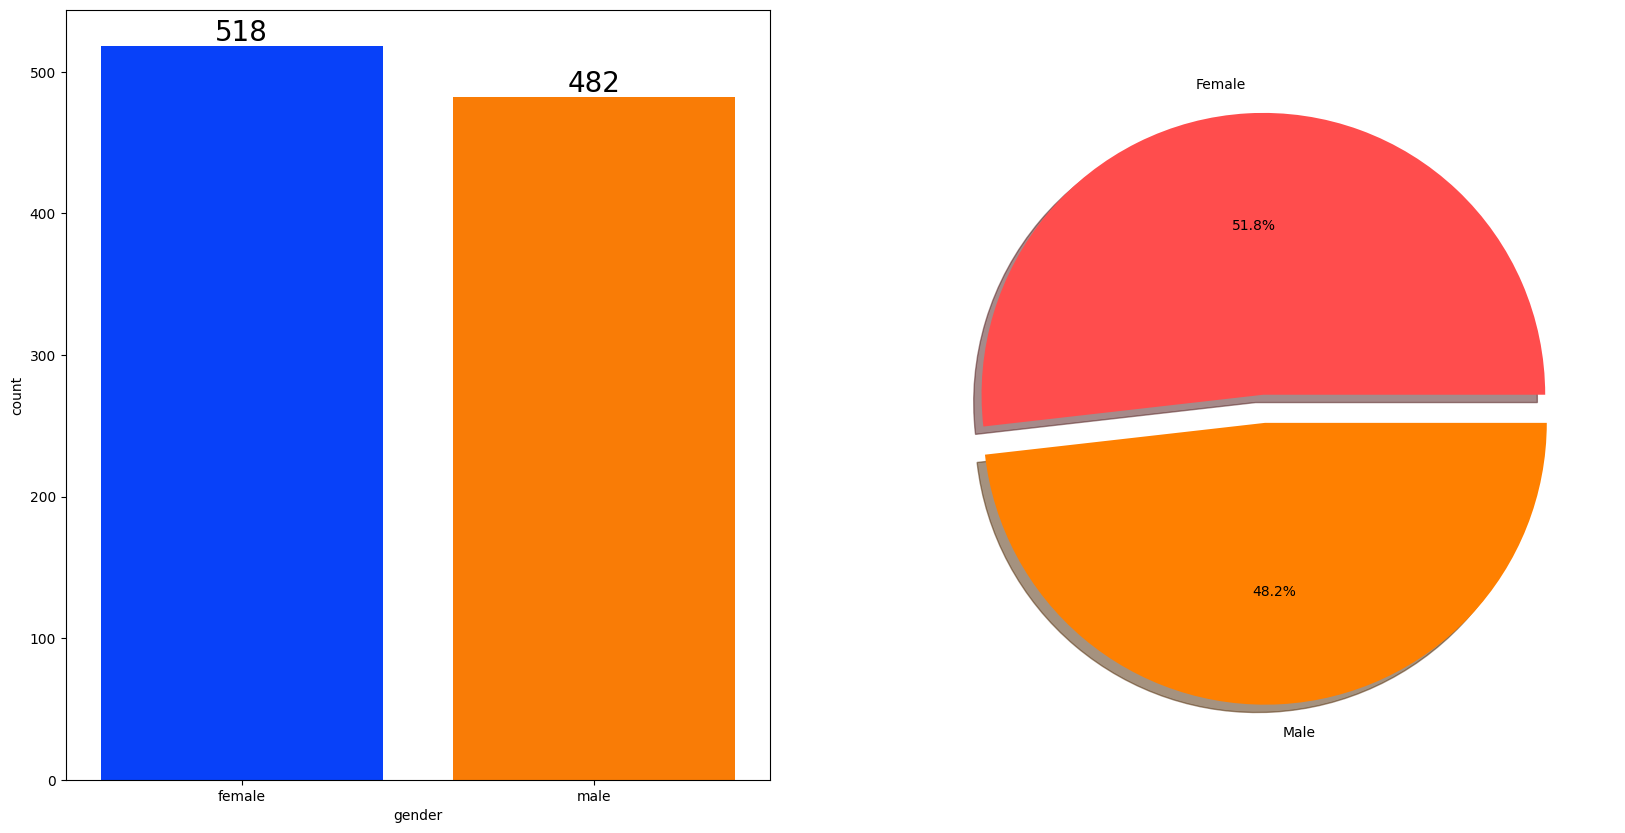

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights
* Gender has balanced data with female student are 518 (51.8%) and mal students are 482 (48.2%)

In [77]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


[0 1]


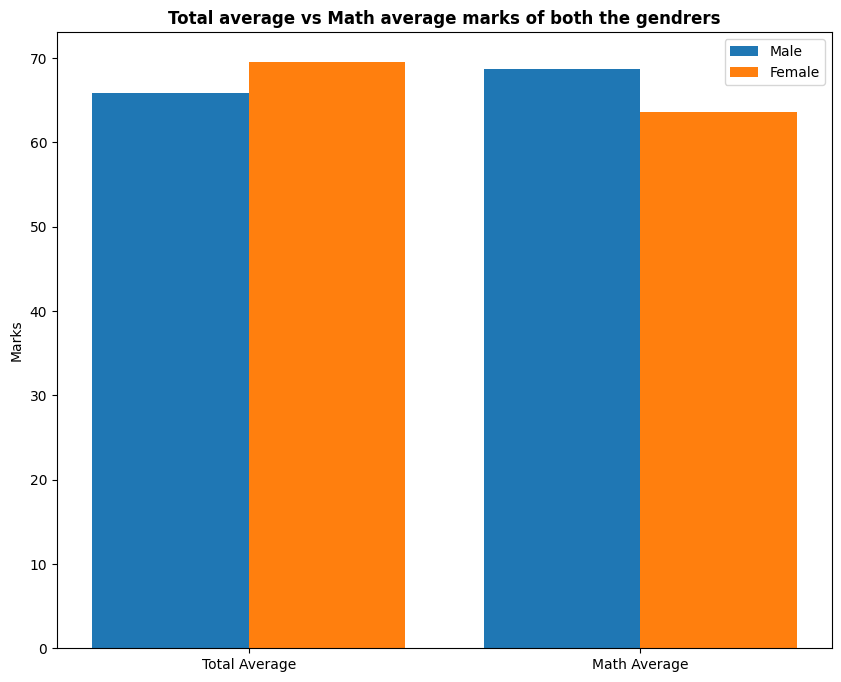

In [80]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_score = [gender_group['average'][0], gender_group['math score'][0]]
male_score = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
print(X_axis)

plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average vs Math average marks of both the gendrers', fontweight='bold')
plt.legend()
plt.show()

##### Insights
* On an average females have a better overall score than men.
* Whereas males have scored higher in Maths.

##### 4.4.2 Race/Ethnicitiy column
* How is Group wise Disribution?
* Is Race/Ehnicity has any impact on student's performance?

([<matplotlib.patches.Wedge at 0x216d2ed1a30>,
 [Text(0.6461720141062023, 1.0111684964366394, 'group C'),
  Text(-1.0461621541481756, 0.33991873621212615, 'group D'),
  Text(-0.49322161839826323, -0.9832255260847321, 'group B'),
  Text(0.5952332509117034, -0.9250391218803047, 'group E'),
  Text(1.0572819245745813, -0.30357030811307883, 'group A')],
 [Text(0.3769336748952847, 0.5898482895880396, '31.9%'),
  Text(-0.5706339022626412, 0.1854102197520688, '26.2%'),
  Text(-0.2690299736717799, -0.5363048324098538, '19.0%'),
  Text(0.3246726823154745, -0.5045667937528934, '14.0%'),
  Text(0.5766992315861351, -0.16558380442531573, '8.9%')])

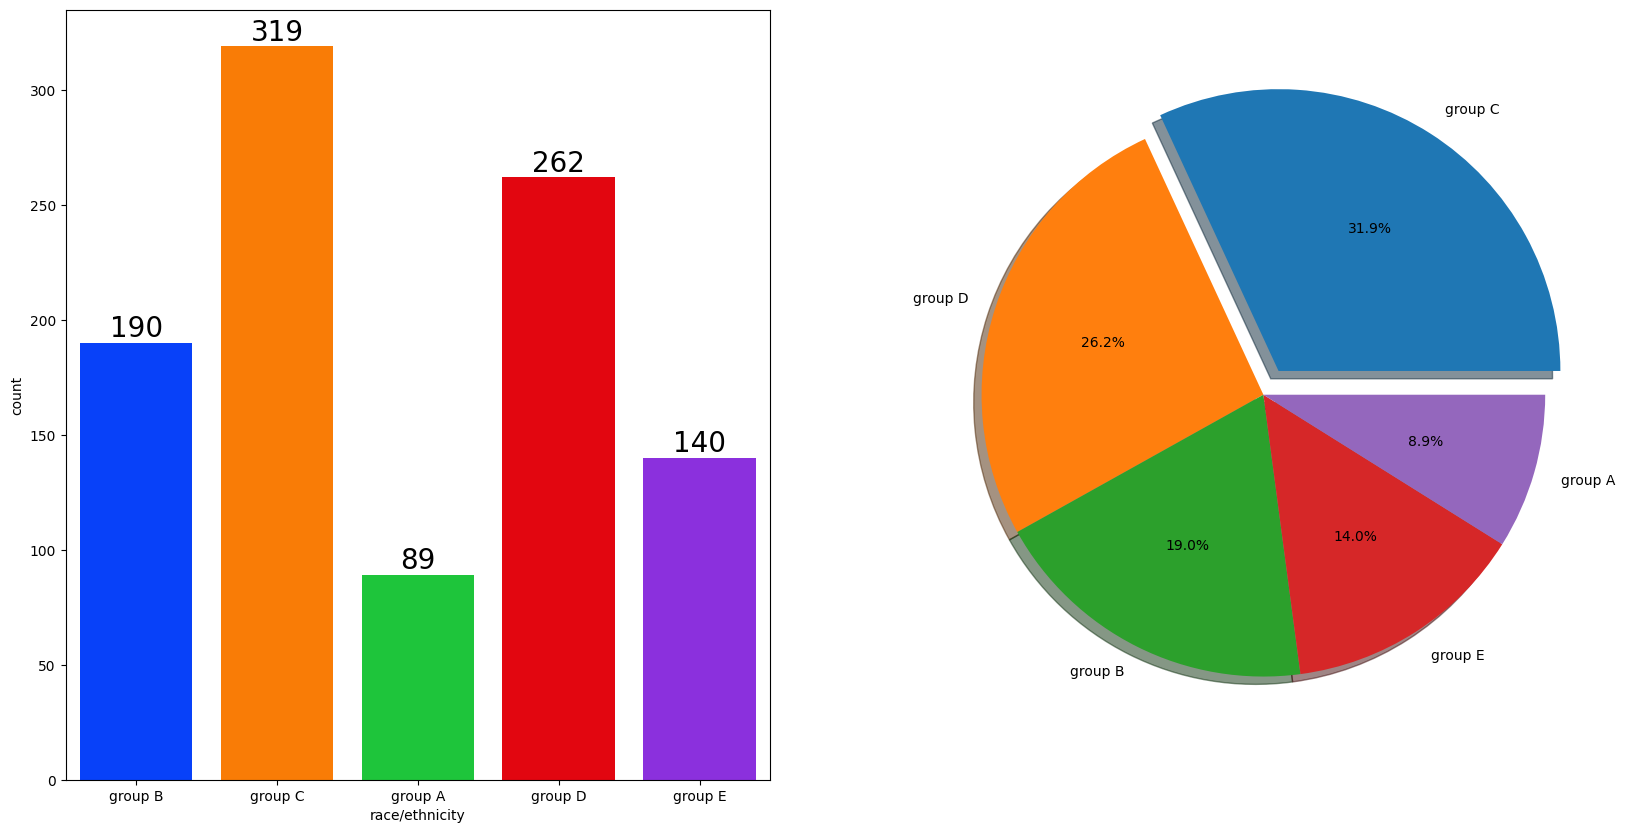

In [81]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df, x=df['race/ethnicity'], palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),
        labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)

##### Insights
* Most of the student belonging from group C/group D.
* Lowest number of students belong to group A. 

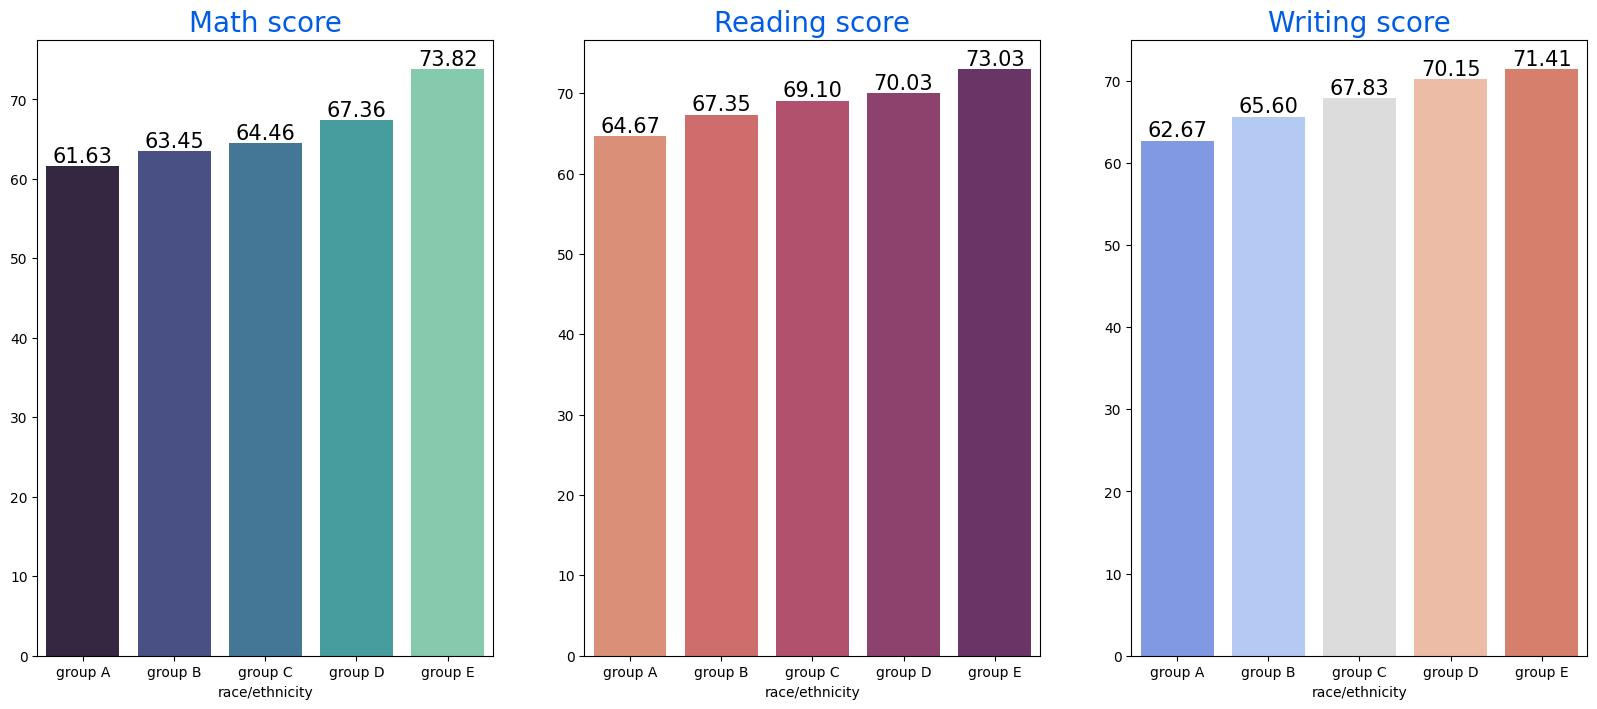

In [95]:
group_data = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.barplot(x=group_data['math score'].mean().index,y=group_data['math score'].mean().values,
            palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15, fmt='%1.2f')

sns.barplot(x=group_data['reading score'].mean().index,y=group_data['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%1.2f')

sns.barplot(x=group_data['writing score'].mean().index,y=group_data['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%1.2f')

##### Insights
* Group E students have scored the highes marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects.

##### 4.4.3 Parntal Level of Education Column

Text(0, 0.5, 'count')

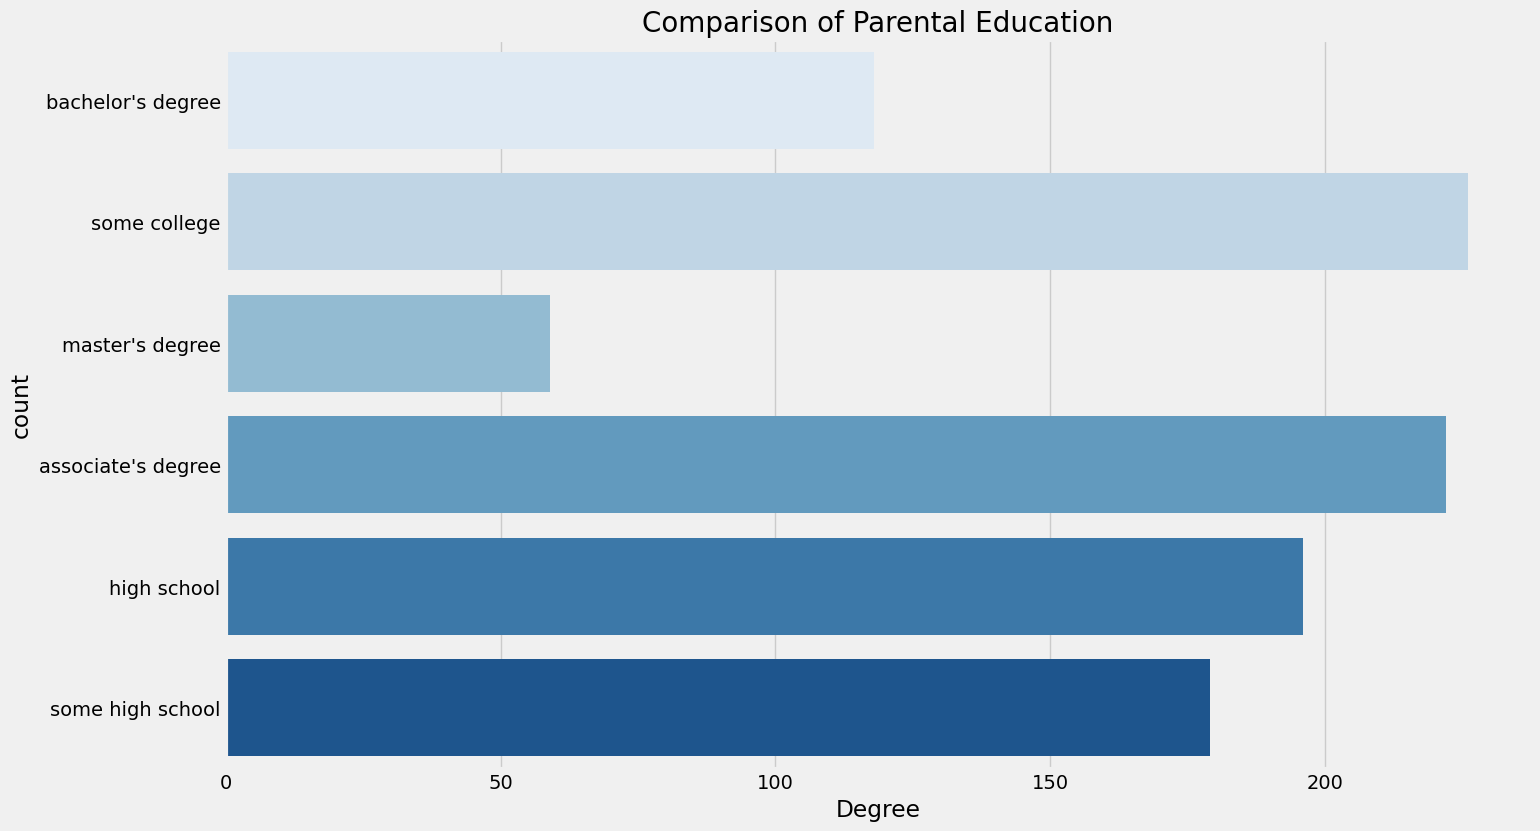

In [98]:
plt.figure(figsize=(15,9))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')

##### Insights
* Lagrest number of parents are from some college.

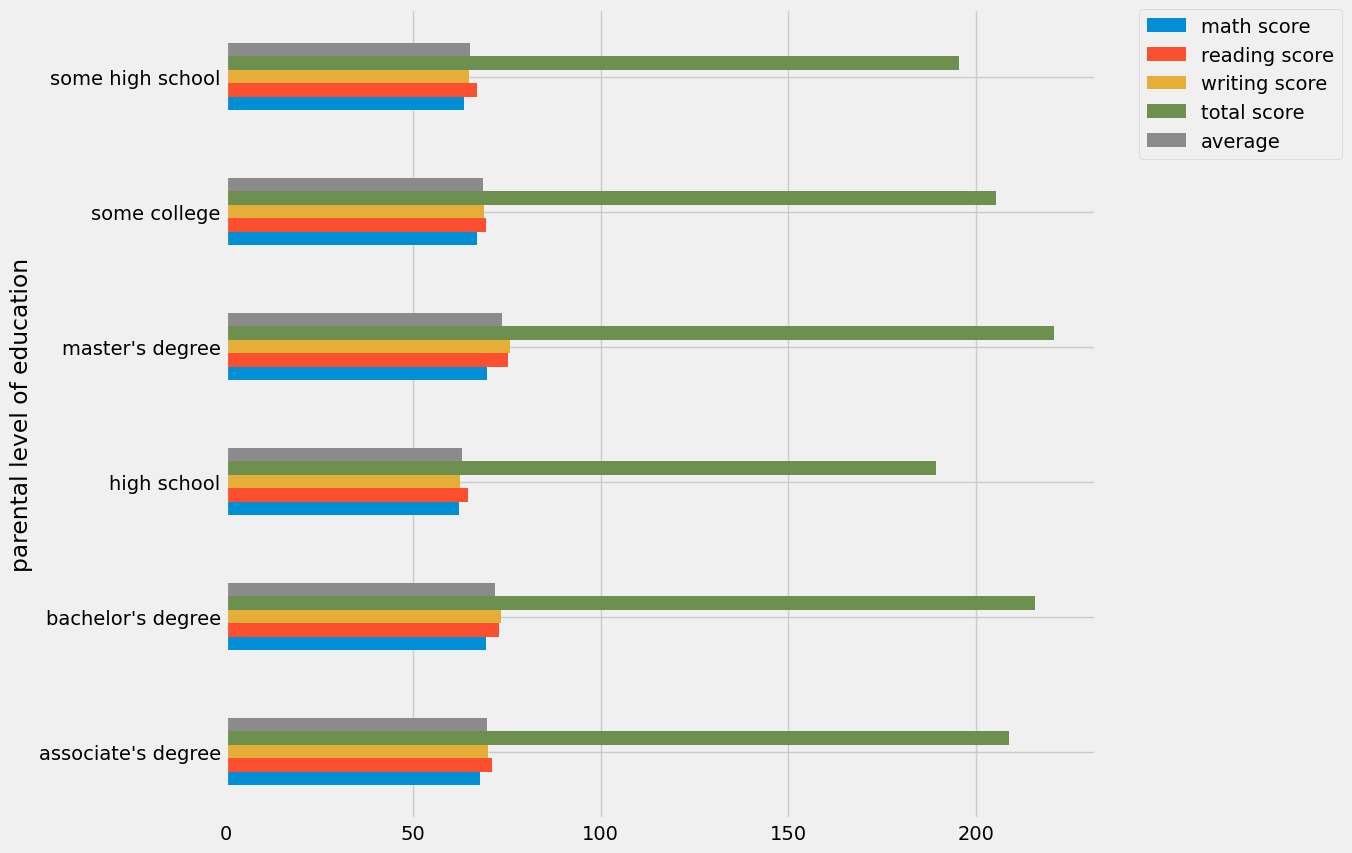

In [100]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
* The score of student whose parents possess master and bachelor level education are higher than others.

##### 4.4.4 Lunch Column

Text(0, 0.5, 'count')

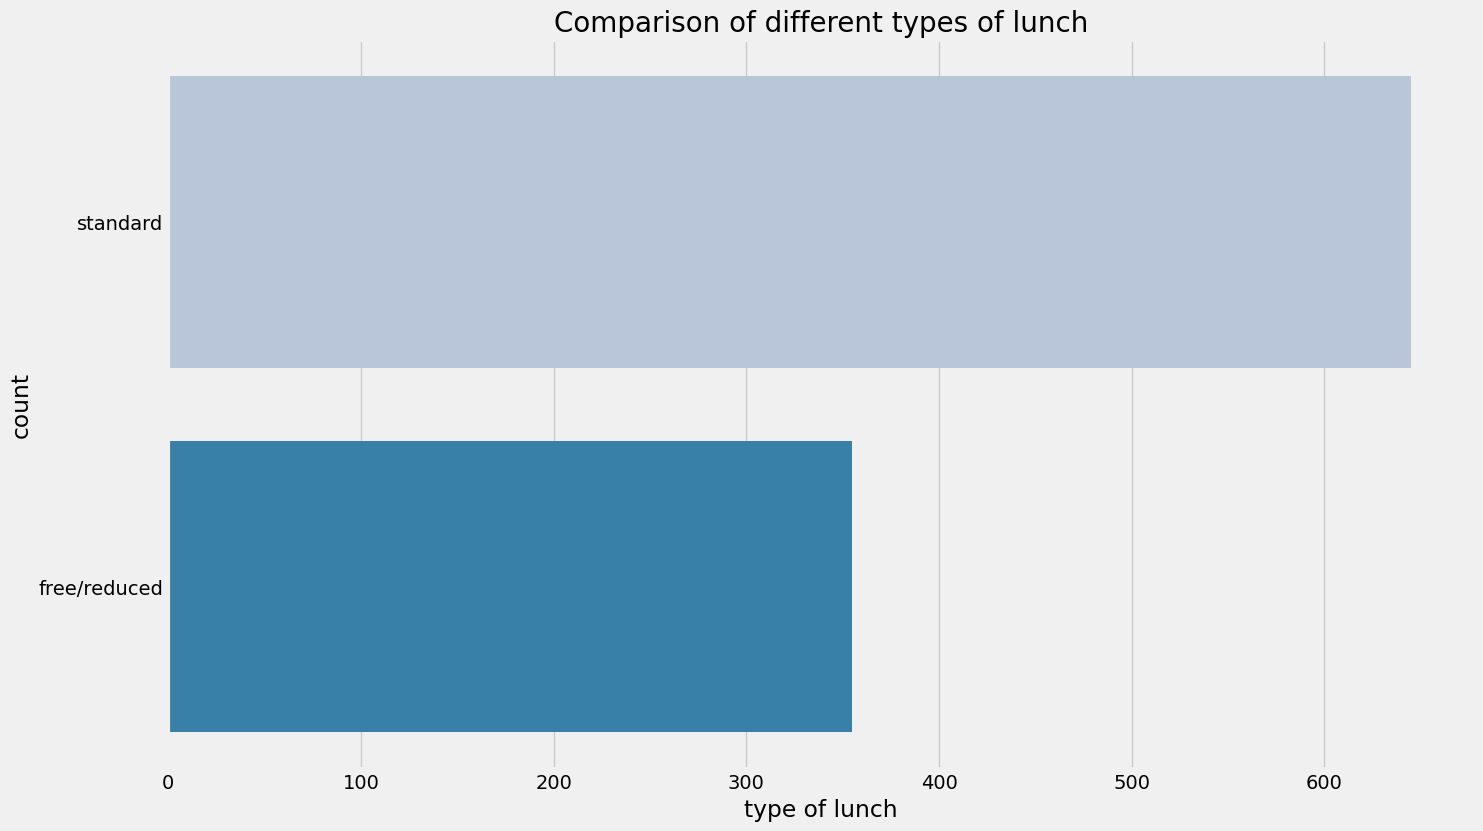

In [103]:
plt.figure(figsize=(15,9))
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('type of lunch')
plt.ylabel('count')

##### Insights
* Students being served Standard lunch was more than free lunch

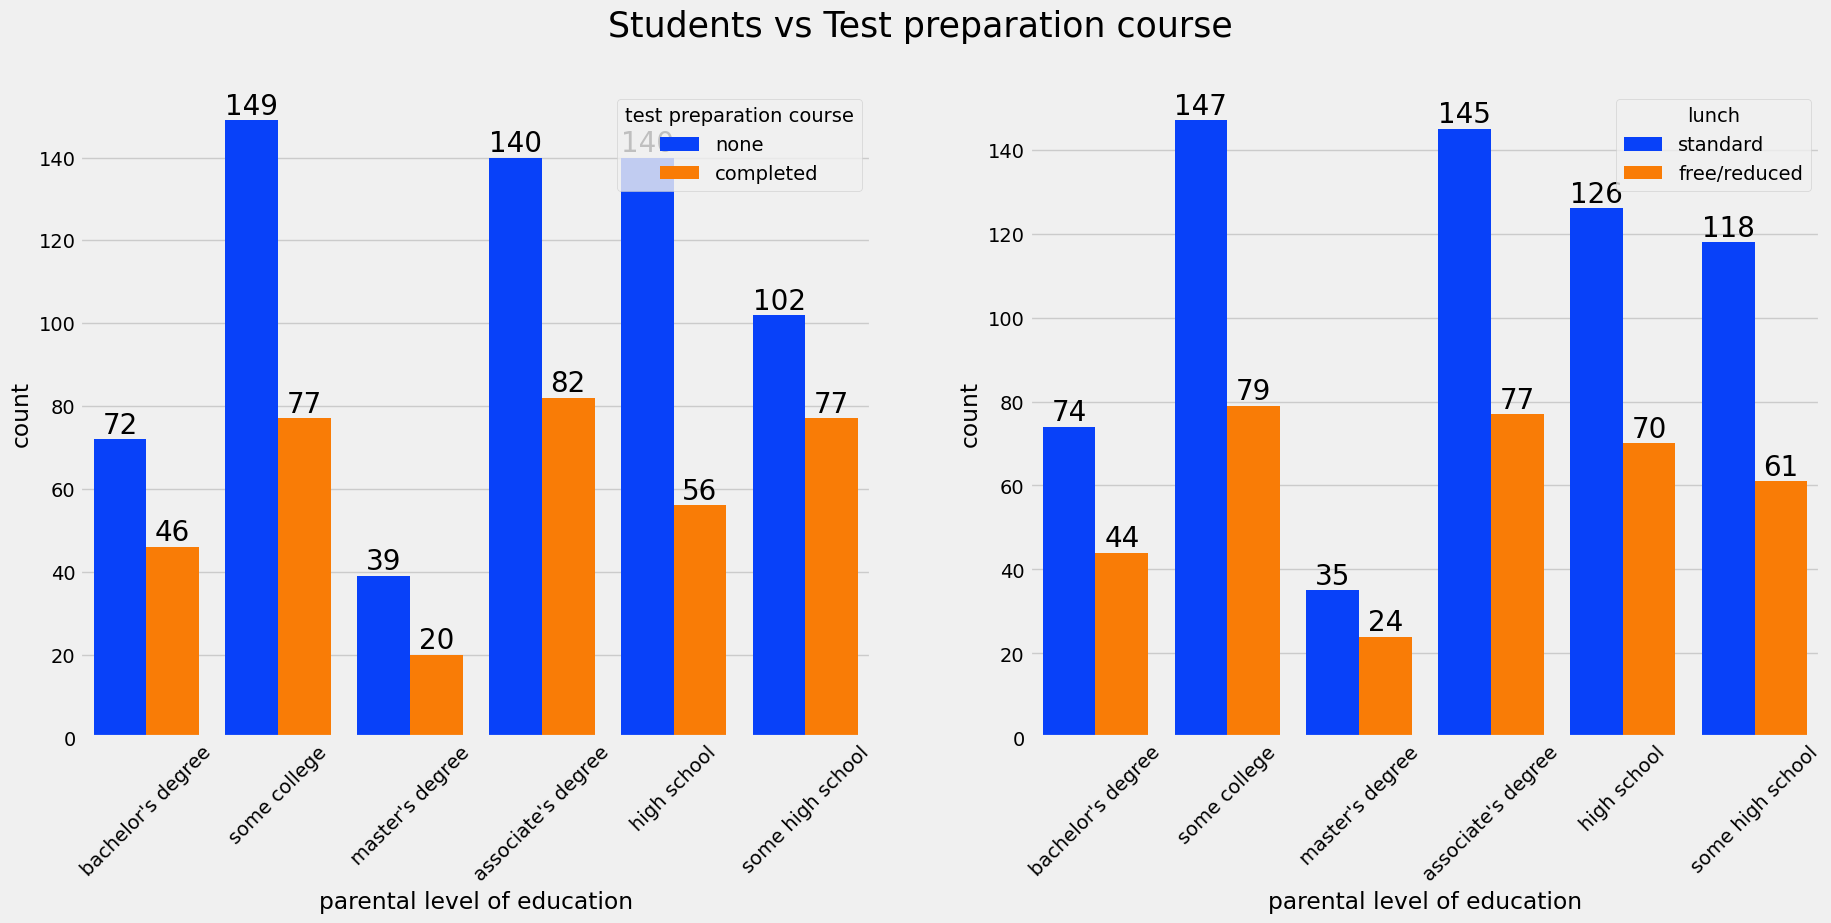

In [117]:
f, ax = plt.subplots(1,2, figsize=(20,8))
f.suptitle('Students vs Test preparation course', color='black', size=25)
sns.countplot(data=df,x=df['parental level of education'],palette='bright',
               hue='test preparation course', saturation=0.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x=df['parental level of education'],
               palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

ax[1].tick_params(axis='x', rotation=45)

##### Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

##### 4.4.5 Test Preparation Course Column 
* Which type of lunch is most common amoung students?
* Is test preparation course has any impact on student's perpfomance?

<Axes: xlabel='lunch', ylabel='writing score'>

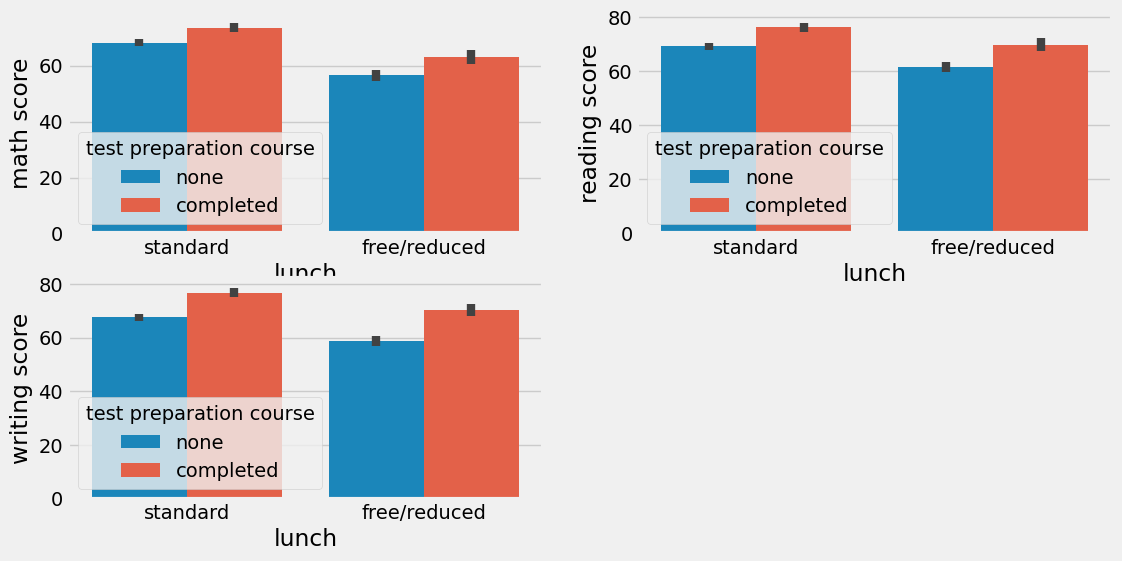

In [118]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

##### Insights
* Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken course

##### 4.4.6 Checking Outliers

<Axes: ylabel='average'>

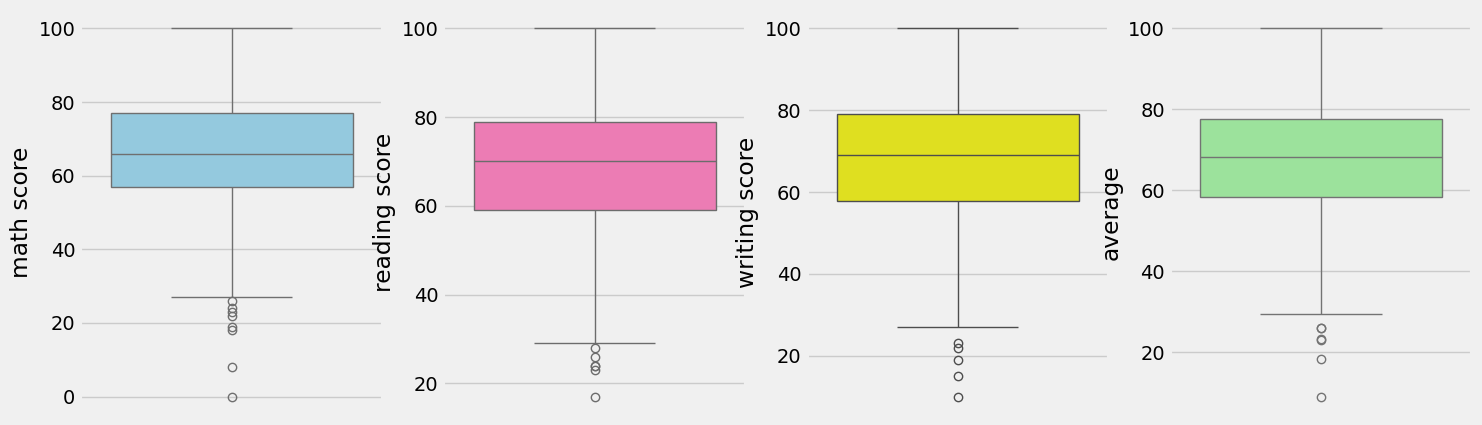

In [119]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

##### 4.4.7 Mutivariate Analysis using Pairplot

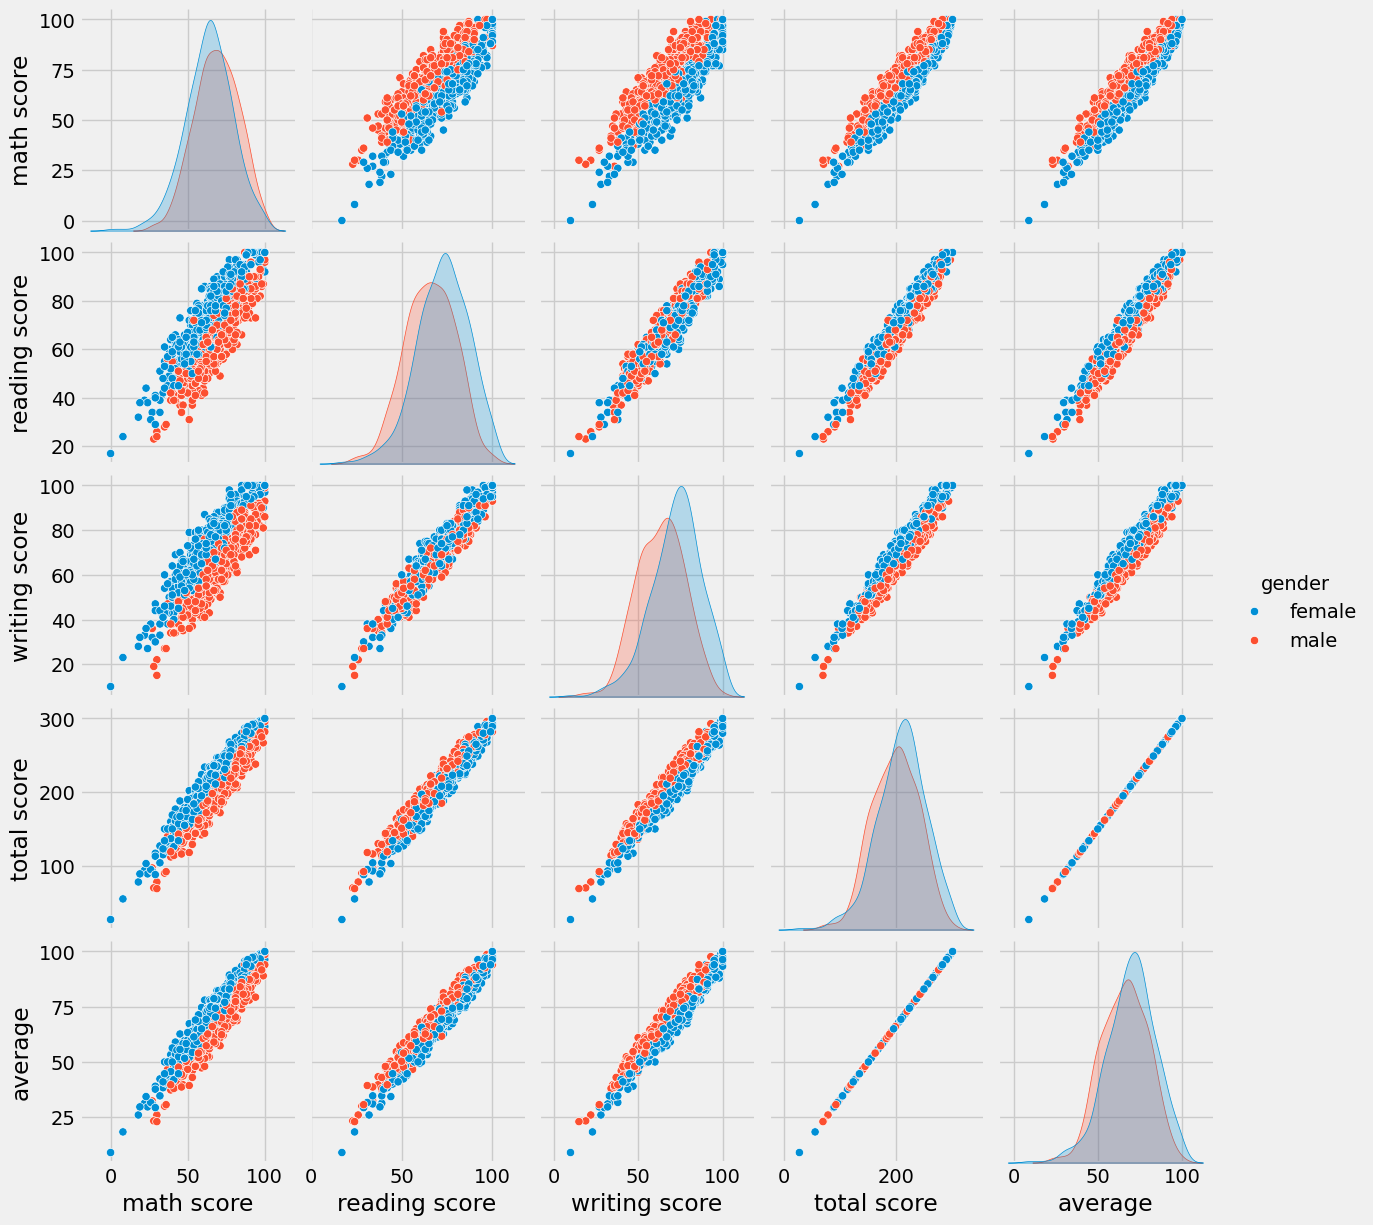

In [120]:
sns.pairplot(df,hue='gender')

##### Insights
* From the above plot it is clear than all the scores increase linearly with each other.

### 5. Conclusions
 * Student's Perfomance is related with lunch, race, parental level education
 * Female lead in pass percentage and also are top-scorers
 * Student's Performance in not much related with test preparaion course
 * Finishing preparation course is benefitial.